import pandas as pd 

In [75]:
data = pd.read_csv('WHO.csv')

In [76]:
data.head()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,0.0,1140,0.0,0.0
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,0.0,8820,0.0,0.0
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,0.0,8310,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,0.00,82,3.2,75.49,0.0,0,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230,93.1,78.2


In [77]:
data.shape

(194, 13)

In [78]:
data.isnull().sum()

Country                          0
Region                           0
Population                       0
Under15                          0
Over60                           0
FertilityRate                    0
LifeExpectancy                   0
ChildMortality                   0
CellularSubscribers              0
LiteracyRate                     0
GNI                              0
PrimarySchoolEnrollmentMale      0
PrimarySchoolEnrollmentFemale    0
dtype: int64

In [79]:
#Need to treat 0s as there are no nans
data[data==0].count()

Country                           0
Region                            0
Population                        0
Under15                           0
Over60                            0
FertilityRate                    11
LifeExpectancy                    0
ChildMortality                    0
CellularSubscribers              10
LiteracyRate                     91
GNI                              32
PrimarySchoolEnrollmentMale      93
PrimarySchoolEnrollmentFemale    93
dtype: int64

In [80]:
data['Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [81]:
for i in data['Region'].unique():
    li=list(data[(data['FertilityRate'] ==0.0) & (data['Region'] ==i)].index)
    data['FertilityRate'][li]=data['FertilityRate'][data['Region']==i].mean()
for i in data ['Region'].unique():
    li=list(data[(data["CellularSubscribers"]==0.0)& data["Region"]==i].index)
    data['CellularSubscribers'][li]=data['CellularSubscribers'][data["Region"]==i].mean()
for i in data ['Region'].unique():
    li=list(data[(data["GNI"]==0.0)& data["Region"]==i].index)
    data['GNI'][li]=data['GNI'][data["Region"]==i].mean()
for i in data ['Region'].unique():
    li=list(data[(data["LiteracyRate"]==0.0)& data["Region"]==i].index)
    data['LiteracyRate'][li]=data['LiteracyRate'][data["Region"]==i].mean()
                   

C:\Users\Sarthak Wadhawan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sarthak Wadhawan\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
C:\Users\Sarthak Wadhawan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Sarthak Wadhawan\Anaconda3\lib\site-packages\ipykerne

In [82]:
#outliers
import matplotlib.pyplot as plt

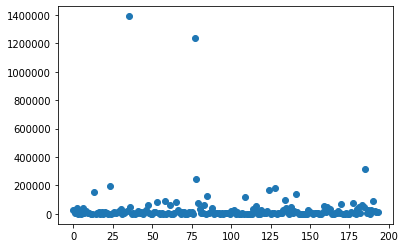

In [83]:
plt.scatter(data['Population'].index, data['Population'])

In [84]:
from scipy import stats
import numpy as np
li=list(data['Population'][np.abs(stats.zscore(data["Population"]))>1].index)

In [85]:
data["Population"][li]=data.drop(li)['Population'].mean()

C:\Users\Sarthak Wadhawan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
li

[23, 35, 77, 78, 128, 185]

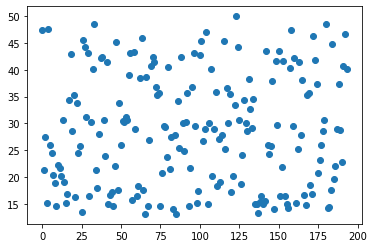

In [87]:
plt.scatter(data['Under15'].index,data['Under15'])

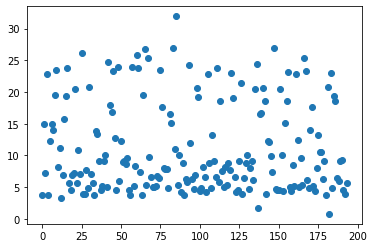

In [88]:
plt.scatter(data['Over60'].index,data['Over60'])

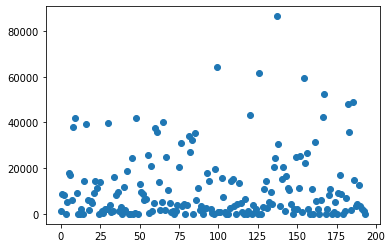

In [89]:
plt.scatter(data['GNI'].index , data['GNI'])

In [90]:
li=list(data['GNI'][np.abs(stats.zscore(data['GNI'])) > 3].index)

In [91]:
#capping
data['GNI']['li']=data['GNI'].sort_values().iloc[-5]

C:\Users\Sarthak Wadhawan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


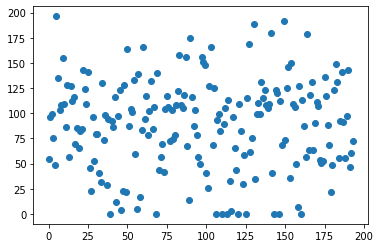

In [92]:
plt.scatter(data['CellularSubscribers'].index,data['CellularSubscribers'])

In [93]:
data.drop('Country',axis=1,inplace=True)

In [94]:
data.head()

,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Eastern Mediterranean,29825.0,47.42,3.82,5.400000,60,98.5,54.26,0.0,1140.0,0.0,0.0
1,Europe,3162.0,21.33,14.93,1.750000,74,16.7,96.39,0.0,8820.0,0.0,0.0
2,Africa,38482.0,27.42,7.17,2.830000,73,20.0,98.99,0.0,8310.0,98.2,96.4
3,Europe,78.0,15.20,22.86,1.661509,82,3.2,75.49,0.0,0.0,78.4,79.4
4,Africa,20821.0,47.58,3.84,6.100000,51,163.5,48.38,70.1,5230.0,93.1,78.2


In [95]:
sorted(data.Region.unique())

['Africa',
 'Americas',
 'Eastern Mediterranean',
 'Europe',
 'South-East Asia',
 'Western Pacific']

In [96]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
for i in data.columns:
    if isinstance(data[i][0],str):
        data[i]=encoder.fit_transform(data[i])

In [97]:
data.head()

,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,2,29825.0,47.42,3.82,5.400000,60,98.5,54.26,0.0,1140.0,0.0,0.0
1,3,3162.0,21.33,14.93,1.750000,74,16.7,96.39,0.0,8820.0,0.0,0.0
2,0,38482.0,27.42,7.17,2.830000,73,20.0,98.99,0.0,8310.0,98.2,96.4
3,3,78.0,15.20,22.86,1.661509,82,3.2,75.49,0.0,0.0,78.4,79.4
4,0,20821.0,47.58,3.84,6.100000,51,163.5,48.38,70.1,5230.0,93.1,78.2


In [109]:
X=data.drop(['LifeExpectancy','PrimarySchoolEnrollmentMale' ,'PrimarySchoolEnrollmentFemale'],axis=1)

In [115]:
y=data['LifeExpectancy']

In [116]:
X.columns

Index(['Region', 'Population', 'Under15', 'Over60', 'FertilityRate',
       'ChildMortality', 'CellularSubscribers', 'LiteracyRate', 'GNI'],
      dtype='object')

In [117]:
from sklearn.model_selection import train_test_split
trainX ,testX , trainy , testy = train_test_split(X , y , test_size=0.5)

In [118]:
from sklearn.linear_model import LinearRegression

In [119]:
mlrm=LinearRegression()

In [120]:
mlrm.fit(trainX,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
mlrm.score(trainX,trainy)*100

89.07922976009071

In [122]:
X.shape

(194, 9)

In [124]:
y.shape

(194,)

In [125]:
mlrm.score(testX,testy)*100

87.85068406355056

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X_vif = add_constant(X)
pd.Series([variance_inflation_factor(X_vif.values,i) 
           for i in range (X_vif.shape[1])],
           index=X_vif.columns)

const                  127.084429
Region                   1.550732
Population               1.022156
Under15                 17.088119
Over60                   3.886284
FertilityRate           12.352453
ChildMortality           4.374028
CellularSubscribers      1.728438
LiteracyRate             1.071895
GNI                      1.781284
dtype: float64

In [129]:
import scipy.stats as stats 
stats.f_oneway(X['Region'],y)

F_onewayResult(statistic=10082.885411564352, pvalue=9.706078097650169e-279)

In [135]:
columns = list(X.columns)
columns.remove('Region')
print(columns)

correlation = pd.Series([np.abs(np.corrcoef(X[i],y)[0,1])
                        for i in columns], index = columns)
correlation

['Population', 'Under15', 'Over60', 'FertilityRate', 'ChildMortality', 'CellularSubscribers', 'LiteracyRate', 'GNI']


Population             0.015251
Under15                0.836467
Over60                 0.688129
FertilityRate          0.831073
ChildMortality         0.924564
CellularSubscribers    0.532386
LiteracyRate           0.072008
GNI                    0.554708
dtype: float64

In [136]:
X.drop('Population',axis=1,inplace=True)

In [138]:
from sklearn.model_selection import train_test_split
trainX ,testX , trainy , testy = train_test_split(X , y , test_size=0.5)

from sklearn.linear_model import LinearRegression
mlrm=LinearRegression()
mlrm.fit(trainX,trainy)

print(mlrm.score(trainX,trainy)*100)
print(mlrm.score(testX,testy)*100)



91.26687761768899
85.71491357656767


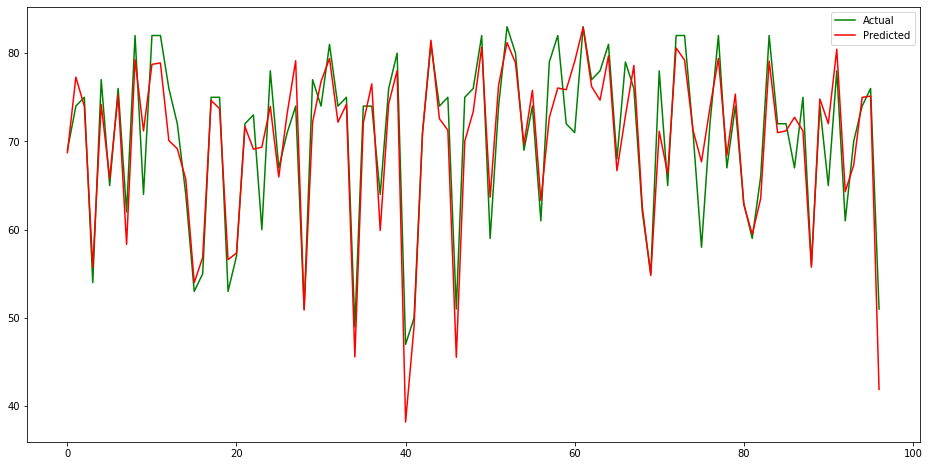

In [139]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(testy.reset_index(drop=True), label='Actual',color='g')
plt.plot(mlrm.predict(testX),label='Predicted',color='r')
plt.legend(loc='upper right')

In [140]:
#PCA starts so the whole thing is done again from the start
data=pd.read_csv('WHO.csv')
data.shape

(194, 13)

In [141]:
encoder=preprocessing.LabelEncoder()

for i in data.columns:
    if isinstance (data[i][0],str):
        data[i]=encoder.fit_transform(data[i])

In [142]:
for i in data['Region'].unique():
    li=list(data[(data['FertilityRate'] ==0.0) & (data['Region'] ==i)].index)
    data['FertilityRate'][li]=data['FertilityRate'][data['Region']==i].mean()
for i in data ['Region'].unique():
    li=list(data[(data["CellularSubscribers"]==0.0)& data["Region"]==i].index)
    data['CellularSubscribers'][li]=data['CellularSubscribers'][data["Region"]==i].mean()
for i in data ['Region'].unique():
    li=list(data[(data["GNI"]==0.0)& data["Region"]==i].index)
    data['GNI'][li]=data['GNI'][data["Region"]==i].mean()
for i in data ['Region'].unique():
    li=list(data[(data["LiteracyRate"]==0.0)& data["Region"]==i].index)
    data['LiteracyRate'][li]=data['LiteracyRate'][data["Region"]==i].mean()
                   

C:\Users\Sarthak Wadhawan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sarthak Wadhawan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Sarthak Wadhawan\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [143]:
li=list(data['GNI'][np.abs(stats.zscore(data['GNI'])) > 3].index)

In [144]:
data['GNI']['li']=data['GNI'].sort_values().iloc[-5]

C:\Users\Sarthak Wadhawan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [145]:
sorted(data.Region.unique())

[0, 1, 2, 3, 4, 5]

In [146]:
X=data.drop(['LifeExpectancy','PrimarySchoolEnrollmentMale' ,'PrimarySchoolEnrollmentFemale'],axis=1)

In [149]:
y=data['LifeExpectancy']

In [148]:
X.drop('Population',axis=1,inplace=True)

In [153]:
X=data.drop('LifeExpectancy',axis=1)

In [154]:
#MAIN CODE FOR PCA
from sklearn.preprocessing import StandardScaler 
  
scalar = StandardScaler() 
  
scalar.fit(X) 
scaled_data = scalar.transform(X) 

# Importing PCA 
from sklearn.decomposition import PCA 
  
# Let's say, components = 2 
pca = PCA() 
pca.fit(scaled_data) 


variance = pca.explained_variance_ratio_ #calculate variance ratios
variance

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print(var)

[ 34.1  50.9  61.7  70.8  78.7  85.3  91.   95.4  98.5  99.7 100.  100. ]


In [155]:
pca = PCA(n_components=8) 
X_transformed = pca.fit_transform(X) 

X_transformed.shape

(194, 8)

In [171]:
from sklearn.model_selection import train_test_split
trainX ,testX , trainy , testy = train_test_split(X , y , test_size=0.2)

from sklearn.linear_model import LinearRegression
mlrm=LinearRegression()
mlrm.fit(trainX,trainy)

print(mlrm.score(trainX,trainy)*100)
print(mlrm.score(testX,testy)*100)

88.51248382508092
89.27228593049196


In [157]:
mlrm.coef_

array([-5.20878877e-03,  2.42402885e-01,  1.86392704e-06, -3.65909782e-01,
       -4.44540042e-02,  2.16831927e+00, -2.13992791e-01,  8.12590239e-01,
       -5.13577364e-02, -1.30184964e-03, -6.42368385e-02,  6.37897911e-02])

In [158]:
data.dtypes

Country                            int32
Region                             int32
Population                         int64
Under15                          float64
Over60                           float64
FertilityRate                    float64
LifeExpectancy                     int64
ChildMortality                   float64
CellularSubscribers              float64
LiteracyRate                     float64
GNI                              float64
PrimarySchoolEnrollmentMale      float64
PrimarySchoolEnrollmentFemale    float64
dtype: object